<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240325_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 선형회귀 모델

In [ ]:
a= np.array([5,10,15,20])
b = np.array([10,15,25,30])
result = pd.DataFrame({"a": a,
                       "b" : b})

In [ ]:
result

,a,b
0,5,10
1,10,15
2,15,25
3,20,30


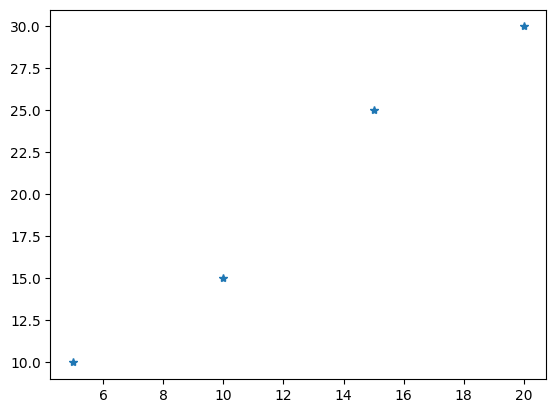

In [ ]:
plt.plot(a,b,'*')

In [ ]:
# 선형회귀 모델 구현
height = np.array([183,150,180,197,160,175]).reshape(-1,1)

In [ ]:
math = np.array([85,45,80,99,45,75])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
line_fitter = LinearRegression()

In [ ]:
line_fitter.fit(height, math)
# fit() 함수 : line_fitter.coef_ : 기울기 저장 , intercept_ : 절편 저장
#

LinearRegression()

In [ ]:
score_predict = line_fitter.predict(height)

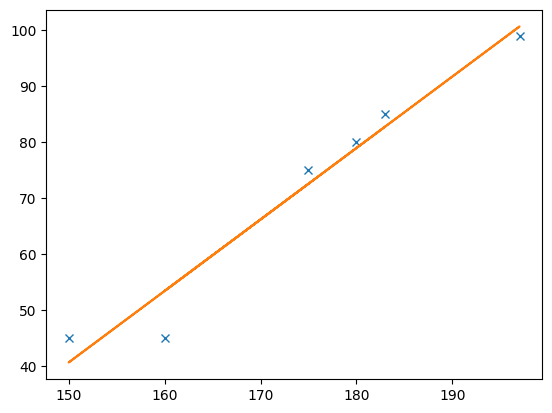

In [ ]:
plt.plot(height,math,'x')
plt.plot(height, score_predict)
plt.show()

In [ ]:
line_fitter.coef_ #기울기

array([1.27957242])

In [ ]:
line_fitter.intercept_ #절편

-151.35886291554093

In [ ]:
# 성능평가
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("Mean_Squared_Error : ",mse(score_predict,math))

Mean_Squared_Error :  17.406045655663863


In [ ]:
#rmse
print("RMSE :",mse(score_predict,math)**0.5)

RMSE : 4.172055327493137


In [ ]:
print("score : ",line_fitter.score(height,math)) # 정확도 평가

score :  0.9569778480189565


## 로지스틱 회귀 모델

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.data[0:5])
print(iris.target)
#target data 0,1,2 = 각각의 앞에 봤던 꽃 이름들과 매칭

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X = iris.data
y = iris.target
#X가 irisi data 받고 y가

In [ ]:
df = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


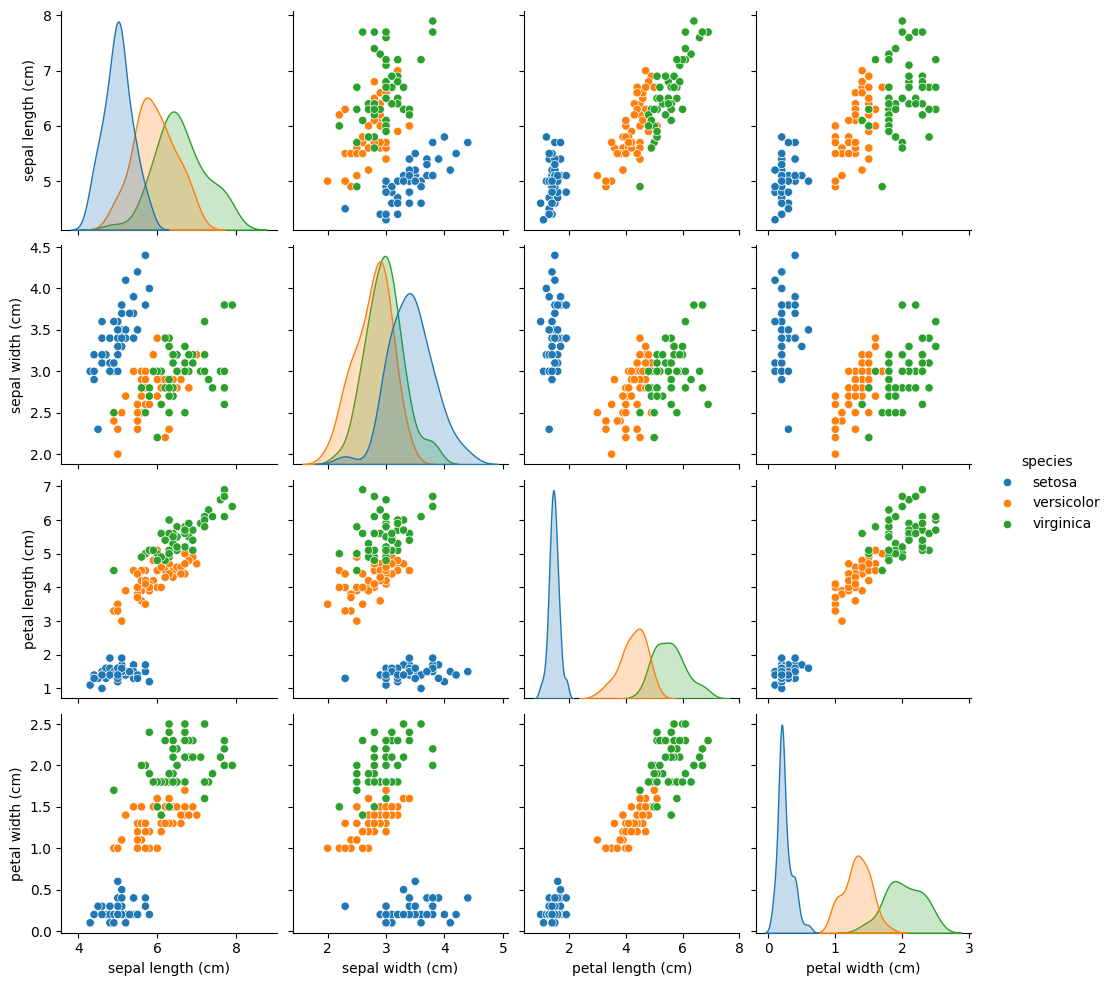

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = np.array([iris.target_names[i] for i in iris.target])

sns.pairplot(df, hue = 'species')
# species를 기준으로 분휴하겠다.
# 3차원 이상 데이터, 카테고리형 데이터 ('species')가 포함되어 있을 때

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# 70프로 트레인, 30% 테스트로 나누기)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_r = LogisticRegression()

In [ ]:
log_r.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
W, b = log_r.coef_,log_r.intercept_

In [ ]:
W, b

(array([[-0.41887908,  0.96710627, -2.52093331, -1.08419917],
        [ 0.53127466, -0.31479242, -0.20020997, -0.94850676],
        [-0.11239557, -0.65231386,  2.72114328,  2.03270593]]),
 array([  9.8405634 ,   2.21733979, -12.05790319]))

In [ ]:
# 정확도 평가
print(log_r.score(X_train,y_train))
# X,y 둘다 트레인 데이터로 훈련시켰을 때의 값

0.9904761904761905


In [ ]:
print(log_r.score(X_test,y_test))
#test데이터로 결과

0.9333333333333333


## 의사 결정 나무 구현

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris.data
y = iris.target
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
df = pd.DataFrame(X, columns = iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 테스트 트레인 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [ ]:
X_train

array([[4.8, 3.4, 1.9, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.6, 3. , 6.6, 2.1],
       [5. , 3.2, 1.2, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [6.5, 3. , 5.5, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [4.4, 2.9, 1.4, 0.2],
       [6. , 2.2, 5. , 1.5],
       [5.8, 4. , 1.2, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [6.4, 3.2, 5.3, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.6, 2.9, 3.6, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [7.2, 3. , 5.8, 1.6],
       [4.7, 3.2, 1.6, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [4.6, 3.4, 1.4, 0.3],
       [4.6, 3.1, 1.5, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.3, 2.5, 5. , 1.9],
       [5.1, 2.5, 3. , 1.1],
       [5.4, 3.9, 1.3, 0.4],
       [4.9, 2

In [ ]:
# 의사결정 나무 불러오기
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier() # 의사결정 나무 생성

In [ ]:
clf = clf.fit(X_train,y_train) #의사결정 나무 훈련

In [ ]:
y_pred = clf.predict(X_test) # 테스트 뎅터 셋을 통해 예측

In [ ]:
from sklearn import metrics

In [ ]:
print( "Accuracy : ",metrics.accuracy_score(y_test,y_pred))
#모델의 정확도 확인

Accuracy :  0.9555555555555556


### 의사결정 나무 그래프 만들기

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

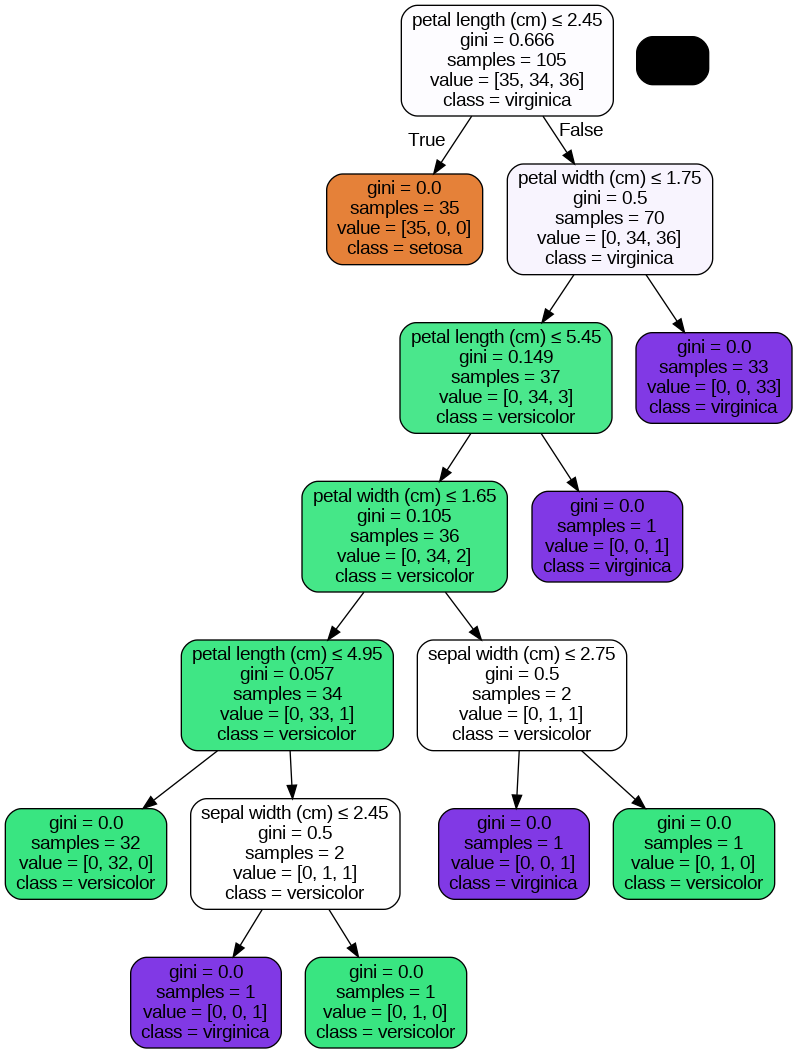

In [ ]:
dot_data = export_graphviz(clf,out_file= None, feature_names = iris.feature_names,
                           class_names = iris.target_names, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
# 100 개의 랜덤포레스트 안에 만들어지는 의사결정 나무의 갯수

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.9333333333333333


In [ ]:
# 어떤 피처가 가장 큰 영향을 끼쳤나?
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)

In [ ]:
feature_imp

petal width (cm)     0.507253
petal length (cm)    0.360742
sepal length (cm)    0.102286
sepal width (cm)     0.029719
dtype: float64

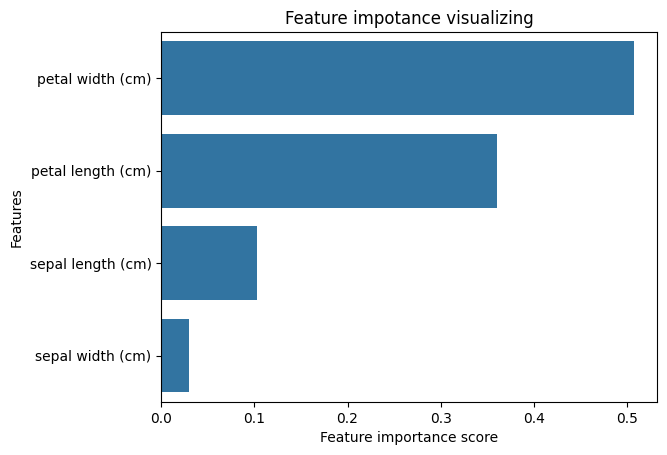

In [ ]:
# 그래프화
sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Feature impotance visualizing')
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5 ) # neighbor 갯수 설정

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Accuracy : ", knn.score(X_test,y_test))

Accuracy :  0.9777777777777777


In [ ]:
# K 가 언제 가장 적합한가??
# k 범위 : 1 ~ 50
k_range = range(1,50)
score = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    score[k] = metrics.accuracy_score(y_test,y_predict)
    score_list.append(metrics.accuracy_score(y_test,y_predict))

Text(0, 0.5, 'Accuracy')

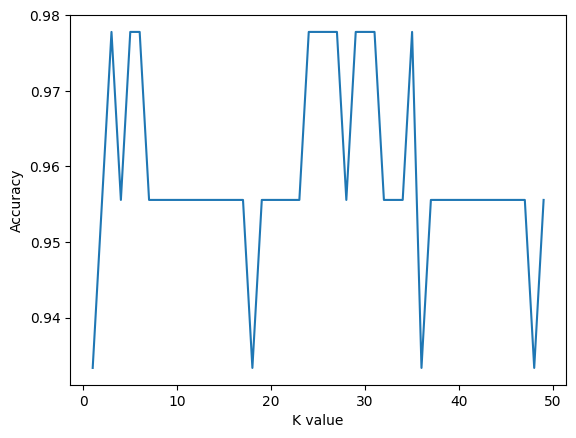

In [ ]:
    # K의 지정해놓은 범위 내에서 어떤 k값이 가장 높은가?? 그래프화
plt.plot(k_range,score_list)
plt.xlabel("K value")
plt.ylabel("Accuracy")